# TITANIC SURVIVAL PREDICTION


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('Titanic-Dataset.csv')       # Dataset from kaggle
print(data.shape)
data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print({col:data[col].isna().sum()for col in data.columns})

{'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Name': 0, 'Sex': 0, 'Age': 177, 'SibSp': 0, 'Parch': 0, 'Ticket': 0, 'Fare': 0, 'Cabin': 687, 'Embarked': 2}


In [6]:
data=data.drop(columns='Cabin',axis=1)

In [7]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [11]:
data['Sex'].value_counts(normalize = True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

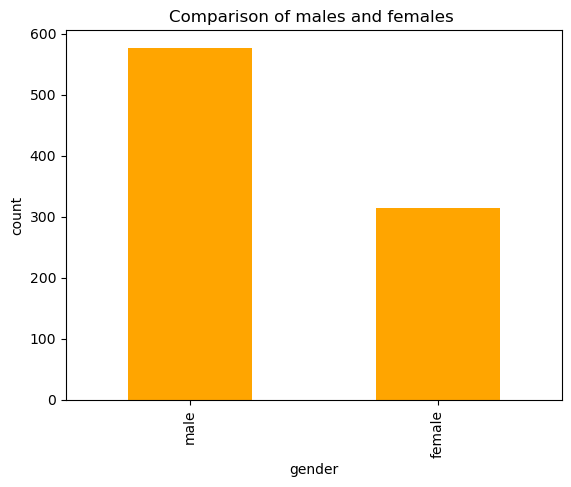

In [12]:
data['Sex'].value_counts(dropna = False).plot.bar(color = 'orange')
plt.title('Comparison of males and females ')
plt.xlabel('gender')
plt.ylabel('count')
plt.show() 

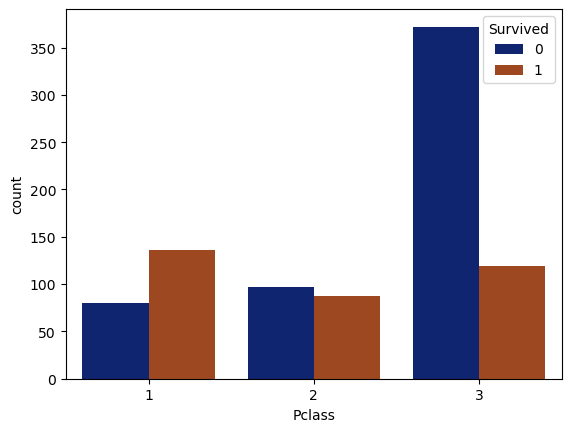

In [13]:
sns.countplot(x = 'Pclass', data = data, hue = 'Survived', palette = 'dark')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['PassengerId'] = le.fit_transform(data['PassengerId'])
data['PassengerId'].value_counts()

0      1
598    1
587    1
588    1
589    1
      ..
300    1
301    1
302    1
303    1
890    1
Name: PassengerId, Length: 891, dtype: int64

In [15]:
data['Survived'] = le.fit_transform(data['Survived'])
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
data['Pclass'] = le.fit_transform(data['Pclass'])
data['Pclass'].value_counts()

2    491
0    216
1    184
Name: Pclass, dtype: int64

In [17]:
data['Sex'] = le.fit_transform(data['Sex'])
data['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [18]:
data['Age'] = le.fit_transform(data['Age'])
data['Age'].value_counts()

88    177
31     30
28     27
23     26
36     25
     ... 
49      1
71      1
4       1
30      1
86      1
Name: Age, Length: 89, dtype: int64

In [19]:
data['SibSp'] = le.fit_transform(data['SibSp'])
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
6      7
5      5
Name: SibSp, dtype: int64

In [20]:
data['Parch'] = le.fit_transform(data['Parch'])
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [21]:
data['Ticket'] = le.fit_transform(data['Ticket'])
data['Ticket'].value_counts()

333    7
568    7
80     7
249    6
566    6
      ..
513    1
98     1
212    1
606    1
466    1
Name: Ticket, Length: 681, dtype: int64

In [22]:
data['Fare'] = le.fit_transform(data['Fare'])
data['Fare'].value_counts()

43     43
85     42
40     38
30     34
138    31
       ..
167     1
148     1
3       1
91      1
73      1
Name: Fare, Length: 248, dtype: int64

In [26]:
data['Embarked'] = le.fit_transform(data['Embarked'])
data['Embarked'].value_counts()

2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64

In [27]:
data['Sex']=data['Sex'].replace('male',0)
data['Sex']=data['Sex'].replace('female',1)

In [28]:
data['Embarked']=data['Embarked'].replace('S',1)
data['Embarked']=data['Embarked'].replace('C',2)
data['Embarked']=data['Embarked'].replace('Q',3)

In [29]:
data.shape

(891, 11)

In [30]:
x=data.drop(columns={'PassengerId','Name','Ticket'},axis=1)
print(x)

     Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0           0       2    1   28      1      0    18         2
1           1       0    0   51      1      0   207         0
2           1       2    0   34      0      0    41         2
3           1       0    0   47      1      0   189         2
4           0       2    1   47      0      0    43         2
..        ...     ...  ...  ...    ...    ...   ...       ...
886         0       1    1   35      0      0    85         2
887         1       0    0   24      0      0   153         2
888         0       2    0   88      1      2   131         2
889         1       0    1   34      0      0   153         0
890         0       2    1   42      0      0    30         1

[891 rows x 8 columns]


In [31]:
y=data['Survived']
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [32]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(668, 8)
(668,)
(223, 8)
(223,)


In [33]:
from sklearn.linear_model import  LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [36]:
y_pred = model.predict(x_test)
print("Training Accuracy :", model.score(x_train, y_train))

Training Accuracy : 1.0


In [37]:
y_pred = model.predict(x_test)
print("Testing Accuracy :", model.score(x_train, y_train))

Testing Accuracy : 1.0
